I wanted to analyze what words were most frequent in certain spotify playlists. I did this using spotipy, the wrapper for Spotify's API, lyricsgenius, a wrapper for Genius's API, and wordcloud, an API that takes in text and produces an image. 


I included four examples: one with my happy playlist, one with my sad playlist, one with all the songs in Tyalor Swift's Red playlist, and one with my current favorites. 

FYI: Sometimes the lyrics genius API crashes if there are too many songs. 

In [208]:
# all imports

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import requests
import lyricsgenius as lg 
from wordcloud import WordCloud


In [338]:
## creds

# this is technically supposed to be secret 
# so shhhh !

#spotify 
sp_client_id = "266170f0f16241d982d8be7a345c32dc"
sp_client_secret = "ca7429c445184d41a1bf7cbb18d5f02b"
playlist_uri = "spotify:playlist:5fwAlPROCapI027G42jNsl"
user_uri = "spotify:user:inner_book_nerd" #dont judge me pls lol 

#geinus
genius_client_id = "6UrQ5oteIqGU_bd1HKixUPUSOqPQ3ZHgI_g1vhPCRPdh3gr4Dzk_f1ZksLpOSSLs"
genius_client_secret = "pcZ5ixPRncAFR95ZxfO2rQRuau0cHrBKLfU7J40dbTYUilDH4K_sGgvkmxQwj3M4LvrrQxQCrV_1vSbKLI_GyA"
genius_pat = "2EfhBoFKheFoBWpjX2rbN1AGgGi5XHbioONXDwKImi-6QgaLDfSF1boYLqV_wx38"

In [329]:
def playlist_info():
    """
    input: none 
    output: playlist, a dict; 
    gets the playlist information using the spotify object
    """
    pat = SpotifyClientCredentials(client_id= sp_client_id, client_secret=sp_client_secret).get_access_token()
    sp = spotipy.Spotify(pat)
    playlist = sp.user_playlist_tracks(user_uri, playlist_uri)
    
    return playlist

def artists_and_tracks():
    """
    input: none
    output: playlist_summary, a list of tuples
    returns all the titles and artists in a given playlist!
    """
    playlist_json = playlist_info()
    playlist_summary = []
    for song in range(len(playlist_json['items'])):
        title = playlist_json['items'][song]['track']['name']
        artist = playlist_json['items'][song]['track']['artists'][0]['name']
        playlist_summary.append((title, artist))
    return playlist_summary

def genius_request(title, artist):
    """
    input: title, a string; artist, a string
    output: a json dictionary
    sends a request to the genius api 
    """
    url = "http://api.genius.com/search"
    headers = {'Authorization': 'Bearer' + genius_pat }
    data = {'q': title + ' ' +  artist}
    response = requests.get(url, data=data, headers = headers)
    return response.json()

def all_lyrics():
    """
    input: none
    output: text, a string
    returns a string with all the lyrics in a playlist (using lyrics genius api)
    """
    playlist_summary = artists_and_tracks()
    text = ""
    rejected_songs = []
    genius = lg.Genius(genius_pat)
    for track in playlist_summary:
        title = track[0]
        artist = track[1]
        song = genius.search_song(title=title, artist=artist)
        try:
            lyrics = song.lyrics
            if lyrics == None:
                rejected_songs.append(track)
            else:
                text += clean_up(lyrics)

        except:
            rejected_songs.append(track)
    return text
 


In [ ]:
def remove_punctuation(word):
    """
    input: word, string
    output: text, string 
    removes all punctuation from a word 
    """
    text = word.translate(str.maketrans('','',string.punctuation))
    return text 


In [333]:
def clean_up(text):
    """
    input: text, a string
    output: cleaned_txt, a string
    preprocesses all text!
    """
    #words like i youll a of etc that connect words 
    stop_words = ['i', "youll", "youre", 'doesnt', "wanna", "know", "cause", "its", "ill","cant", "dont", "im" ,  "ooh", "ah", "dont", "cant", "wont",'itll', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'make', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]
    
    # other words i discovered i wanted to remove from testing
    other_words = ['prechorus', 'version', 's' , 'feat', 'ohhhoh', 'verse','[verse', '[verse 1]', 'bridge', "oohooh" ,'lyricsverse', '[verse 3]', '[chorus]', '[pre-chorus]',  '\ ' ,'embed', "verse", "1", "2", "chorus", '[', ']',]
    
    all_words = stop_words + other_words
    
    #sometimes the text files have weird strings  
    if "October 2020 Singles Release Calendar" in text:
        cleaned_txt = " "
    elif  "10" in text or "(2018)" in text:
        cleaned_txt = " "
    else:
        text = text.split()
        text_lower = [word.lower() for word in text]
        text_punc = [remove_punctuation(word) for word in text_lower]
        words = [word for word in text_punc if word not in all_words and len(word) > 3]
        cleaned_txt = ' '.join(words)
  
    return cleaned_txt 

        



/var/folders/86/7p6zt3rd1jz7gwd3wmbkzcw80000gn/T/ipykernel_965/1735891803.py:2: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  pat = SpotifyClientCredentials(client_id= sp_client_id, client_secret=sp_client_secret).get_access_token()


Searching for "All We Do" by Oh Wonder...
Done.
Searching for "the 1" by Taylor Swift...
Done.
Searching for "I" by Yiruma...
Specified song does not contain lyrics. Rejecting.
Searching for "May Be" by Yiruma...
Specified song does not contain lyrics. Rejecting.
Searching for "Love Me" by Yiruma...
Specified song does not contain lyrics. Rejecting.
Searching for "River Flows In You" by Yiruma...
Specified song does not contain lyrics. Rejecting.
Searching for "Passing By" by Yiruma...
Done.
Searching for "It's Your Day" by Yiruma...
Specified song does not contain lyrics. Rejecting.
Searching for "When The Love Falls" by Yiruma...
Specified song does not contain lyrics. Rejecting.
Searching for "Left My Hearts" by Yiruma...
Specified song does not contain lyrics. Rejecting.
Searching for "Time Forgets..." by Yiruma...
Specified song does not contain lyrics. Rejecting.
Searching for "On The Way" by Yiruma...
Specified song does not contain lyrics. Rejecting.
Searching for "Till I Find 

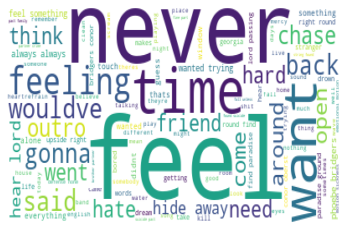

In [339]:

# run this file to produce the word cloud

text = all_lyrics()

wordcloud = WordCloud(background_color="white").generate(text)

import matplotlib.pyplot as plt
plt.imshow(wordcloud, interpolation='bilinear', aspect='auto')
plt.axis("off")

wordcloud.to_file("currentfavs.png")

